In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import networkx as nx
import matplotlib.pyplot as plt

from gensim.models import Word2Vec, KeyedVectors
from scipy.stats import spearmanr

In [23]:
# read text file and create dataframe with columns: word1	word2	POS	SimLex999	conc(w1)	conc(w2)	concQ	Assoc(USF)	SimAssoc333	SD(SimLex)
# read text file and create dataframe with columns: word1	word2	POS	SimLex999	conc(w1)	conc(w2)	concQ	Assoc(USF)	SimAssoc333	SD(SimLex)
# with first row as column names
df = pd.read_csv('D:\DS504 Natural Language Processing\Assignment 2\SimLex-999.txt', sep='\t', header=0)

# print first 5 rows of dataframe
df.head()

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93


In [24]:
# evaluate model on SimLex-999 dataset using spearmen correlation coefficient
def evaluate_model(model, df):
    # create list of word pairs
    word_pairs = list(zip(df['word1'], df['word2']))
    # create list of similarity scores
    similarity_scores = []
    # create list of predicted similarity scores
    predicted_similarity_scores = []
    cnt = 0
    total = 0
    # iterate over word pairs
    for word_pair in word_pairs:
        total += 1
        # get word embeddings for word pair if both words are present in vocabulary
        if word_pair[0] in model.wv.key_to_index.keys() and word_pair[1] in model.wv.key_to_index.keys():
            word1_embedding = model.wv[word_pair[0]]
            word2_embedding = model.wv[word_pair[1]]
        else:
            continue
        # calculate cosine similarity between word embeddings
        cosine_similarity = np.dot(word1_embedding, word2_embedding) / (np.linalg.norm(word1_embedding) * np.linalg.norm(word2_embedding))
        # append cosine similarity to predicted similarity scores list
        predicted_similarity_scores.append(cosine_similarity)
        # append similarity score to similarity scores list
        similarity_scores.append(df[df['word1'] == word_pair[0]][df['word2'] == word_pair[1]]['SimLex999'].values[0])
        cnt += 1
    
    print('Evaluated for {} word pairs out of {}'.format(cnt, total))
    # calculate spearman correlation
    spearman_correlation = spearmanr(similarity_scores, predicted_similarity_scores)
    # return spearman correlation
    return spearman_correlation

In [42]:
# plot nodes and edges of 4 words that are given as input to the function
def plot_graph(word1, word2, word3, word4, model):
    G = nx.Graph()
    
    G.add_edge(word1, word2)
    G.add_edge(word3, word4)
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color='red')
    nx.draw_networkx_edges(G, pos, edge_color='black')
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
    # add border to the plot
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis('on')
    plt.show()


In [36]:
words_list = [
    ['man', 'woman', 'son', 'daughter'], 
['fast', 'fastest', 'cold', 'coldest'], 
['large', 'largest', 'high', 'highest'], 
['sing', 'singing', 'walk', 'walking'], 
['predicting', 'predicted', 'flying', 'flew'], 
['saying', 'said', 'implementing', 'implemented'], 
['buy', 'bought', 'sell', 'sold'], 
['seeing', 'saw', 'singing', 'sang'], 
['walking', 'walked', 'sleeping', 'slept'], 
['thinking', 'thought', 'flying', 'flew']]


SKIPGRAM WITHOUT NEGATIVE SAMPLING

d:\codes\python\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Evaluated for 997 word pairs out of 999
Spearman correlation for Skip Gram without Negative Sampling model:  -0.02312183015278527  with p-value:  0.46584232925773683
Plotting Semantic Analogy for Skip Gram without Negative Sampling
Analogy: man is to woman as son is to daughter


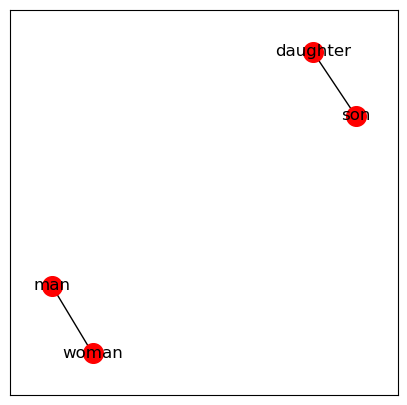

Analogy: fast is to fastest as cold is to coldest


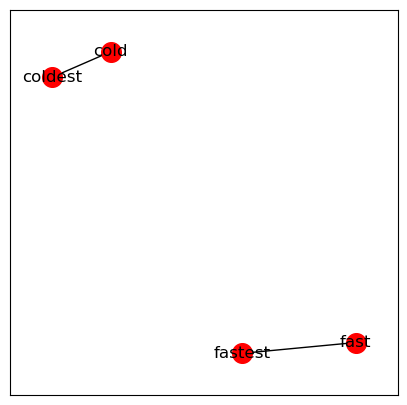

Analogy: large is to largest as high is to highest


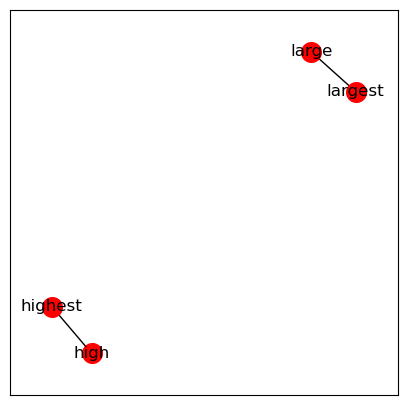

Analogy: sing is to singing as walk is to walking


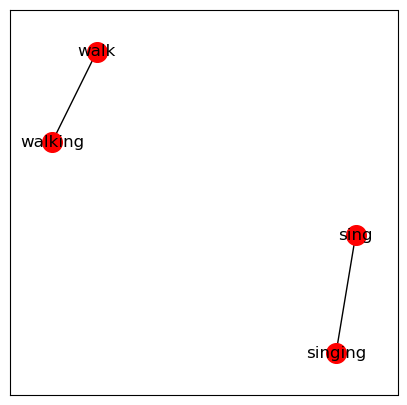

Analogy: predicting is to predicted as flying is to flew


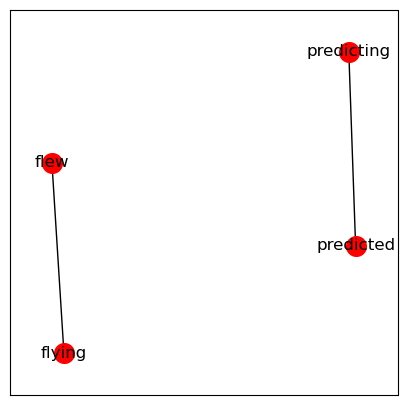

Analogy: saying is to said as implementing is to implemented


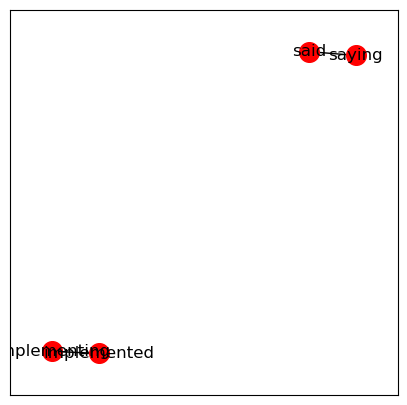

Analogy: buy is to bought as sell is to sold


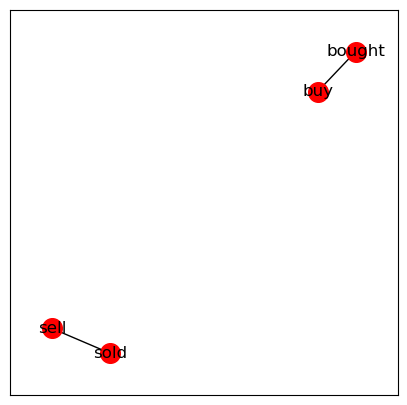

Analogy: seeing is to saw as singing is to sang


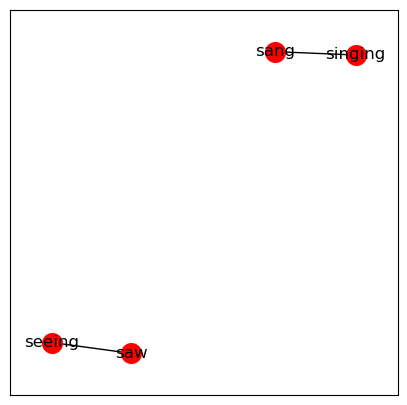

Analogy: walking is to walked as sleeping is to slept


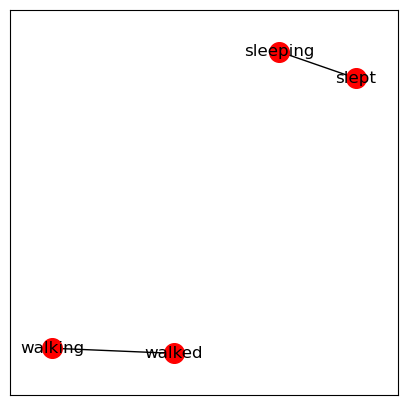

Analogy: thinking is to thought as flying is to flew


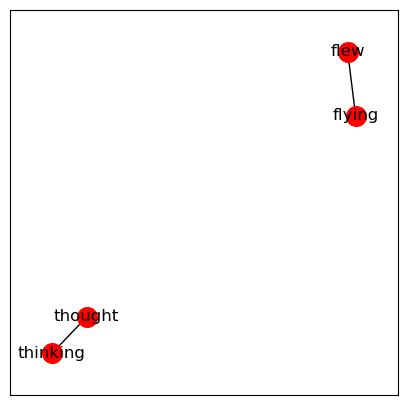

In [47]:
# load skip-gram model
skip_no_negative = Word2Vec.load('D:\DS504 Natural Language Processing\Assignment 2\skip_without_negative_model')

# evaluate
sp = evaluate_model(skip_no_negative, df)

# print spearman correlation score
print('Spearman correlation for Skip Gram without Negative Sampling model: ', sp.correlation, ' with p-value: ', sp.pvalue)

print("Plotting Semantic Analogy for Skip Gram without Negative Sampling")

for a, b, c, d in words_list:
    print("Analogy: {} is to {} as {} is to {}".format(a, b, c, d))
    plot_graph(a, b, c, d, skip_no_negative)

SKIPGRAM WITH NEGATIVE SAMPLING

d:\codes\python\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Evaluated for 997 word pairs out of 999
Spearman correlation for Skip Gram with Negative Sampling model:  0.29804688680582136  with p-value:  6.676087027656775e-22
Plotting Semantic Analogy for Skip Gram with Negative Sampling
Analogy: man is to woman as son is to daughter


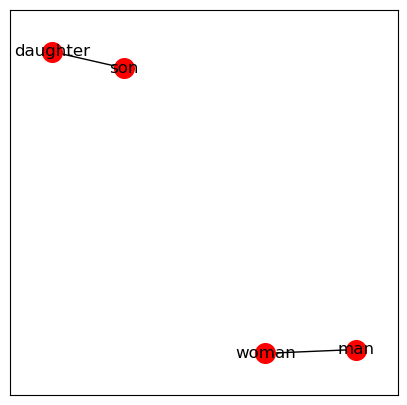

Analogy: fast is to fastest as cold is to coldest


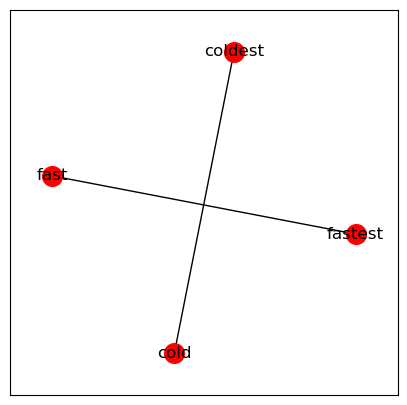

Analogy: large is to largest as high is to highest


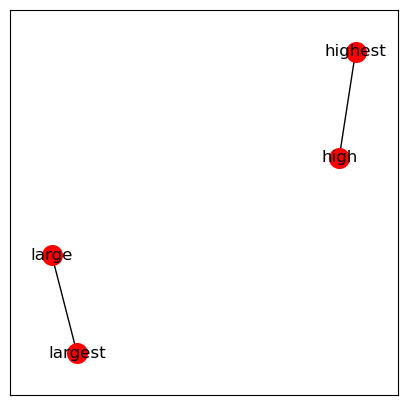

Analogy: sing is to singing as walk is to walking


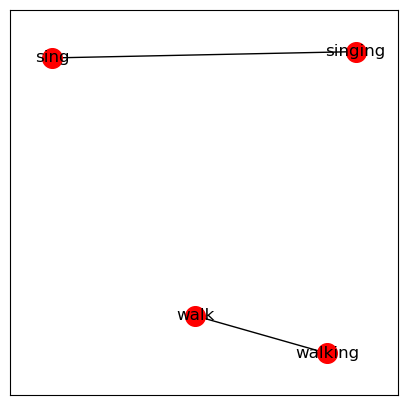

Analogy: predicting is to predicted as flying is to flew


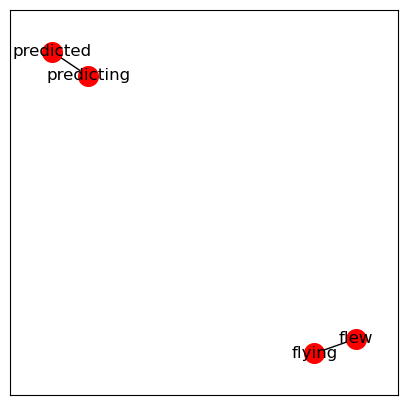

Analogy: saying is to said as implementing is to implemented


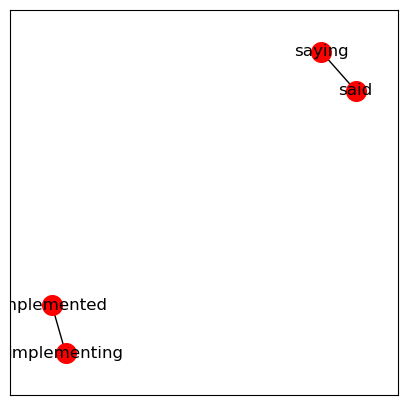

Analogy: buy is to bought as sell is to sold


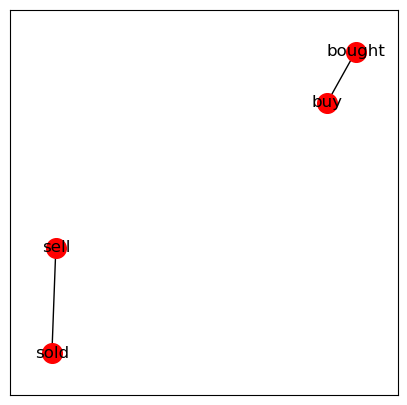

Analogy: seeing is to saw as singing is to sang


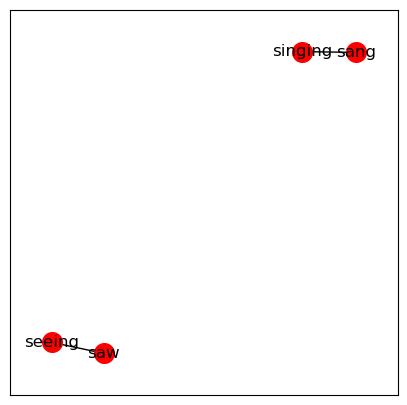

Analogy: walking is to walked as sleeping is to slept


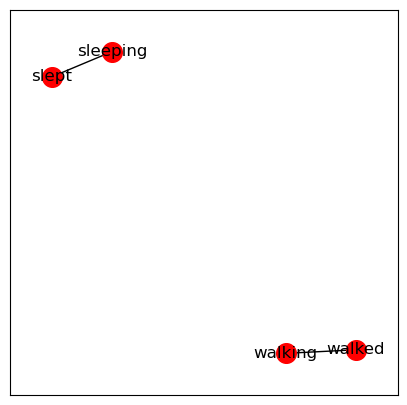

Analogy: thinking is to thought as flying is to flew


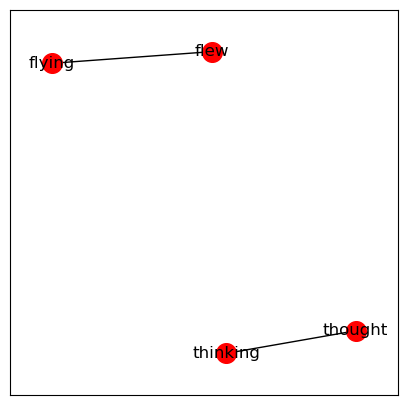

In [46]:
# load skip-gram model
skip_negative = Word2Vec.load('D:\DS504 Natural Language Processing\Assignment 2\skip_with_negative_model')

# evaluate
sp = evaluate_model(skip_negative, df)

# print spearman correlation score
print('Spearman correlation for Skip Gram with Negative Sampling model: ', sp.correlation, ' with p-value: ', sp.pvalue)

print("Plotting Semantic Analogy for Skip Gram with Negative Sampling")

for a, b, c, d in words_list:
    print("Analogy: {} is to {} as {} is to {}".format(a, b, c, d))
    plot_graph(a, b, c, d, skip_negative)

CBOW WITHOUT NEGATIVE SAMPLING

d:\codes\python\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Evaluated for 997 word pairs out of 999
Spearman correlation for CBOW without Negative Sampling model:  -0.02312183015278527  with p-value:  0.46584232925773683
Plotting Semantic Analogy for CBOW without Negative Sampling
Analogy: man is to woman as son is to daughter


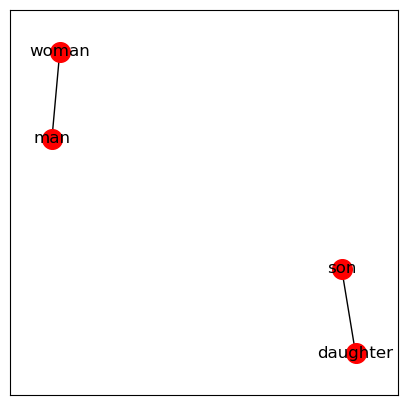

Analogy: fast is to fastest as cold is to coldest


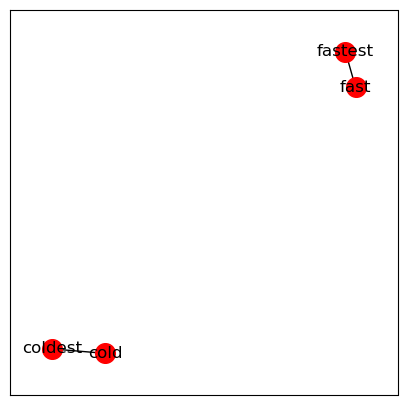

Analogy: large is to largest as high is to highest


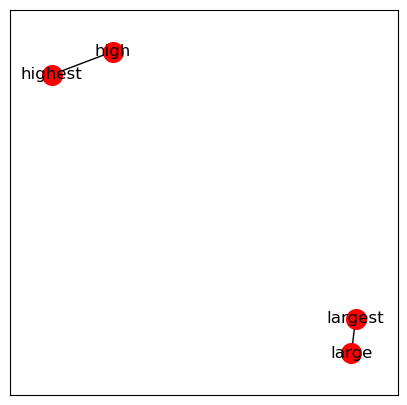

Analogy: sing is to singing as walk is to walking


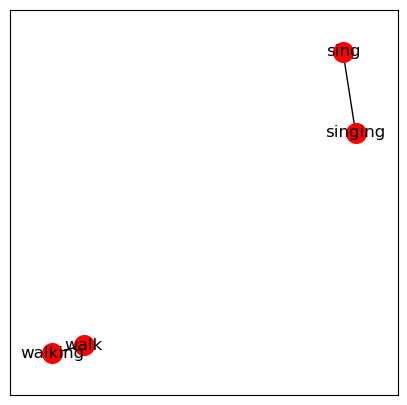

Analogy: predicting is to predicted as flying is to flew


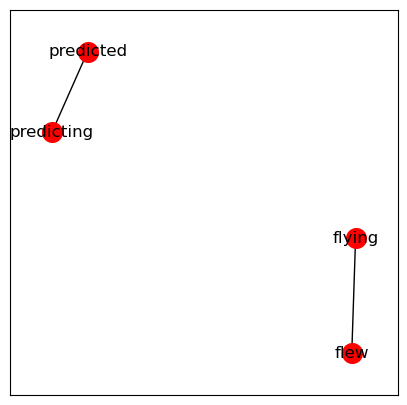

Analogy: saying is to said as implementing is to implemented


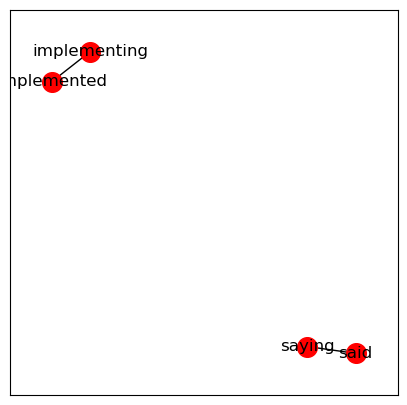

Analogy: buy is to bought as sell is to sold


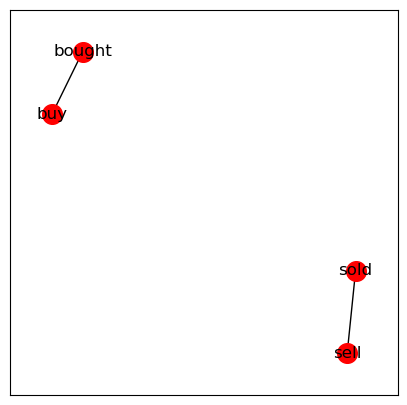

Analogy: seeing is to saw as singing is to sang


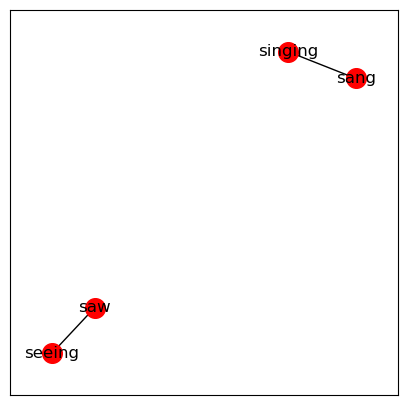

Analogy: walking is to walked as sleeping is to slept


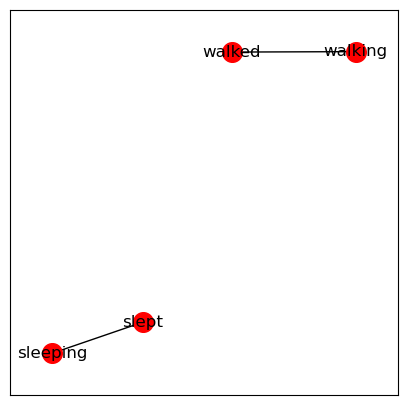

Analogy: thinking is to thought as flying is to flew


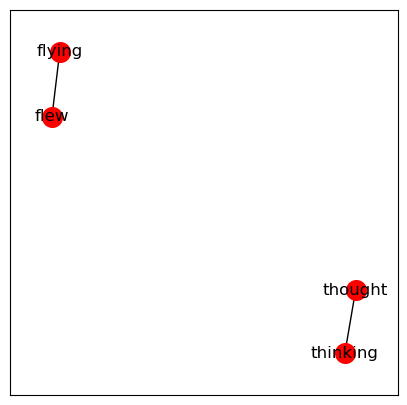

In [48]:
# load skip-gram model
cbow_no_negative = Word2Vec.load('D:\DS504 Natural Language Processing\Assignment 2\cbow_without_negative_model')

# evaluate
sp = evaluate_model(cbow_no_negative, df)

# print spearman correlation score
print('Spearman correlation for CBOW without Negative Sampling model: ', sp.correlation, ' with p-value: ', sp.pvalue)

print("Plotting Semantic Analogy for CBOW without Negative Sampling")

for a, b, c, d in words_list:
    print("Analogy: {} is to {} as {} is to {}".format(a, b, c, d))
    plot_graph(a, b, c, d, cbow_no_negative)

CBOW WITH NEGATIVE SAMPLING

d:\codes\python\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Evaluated for 997 word pairs out of 999
Spearman correlation for CBOW with Negative Sampling model:  0.2588444134398586  with p-value:  1.0000711990950933e-16
Plotting Semantic Analogy for CBOW with Negative Sampling
Analogy: man is to woman as son is to daughter


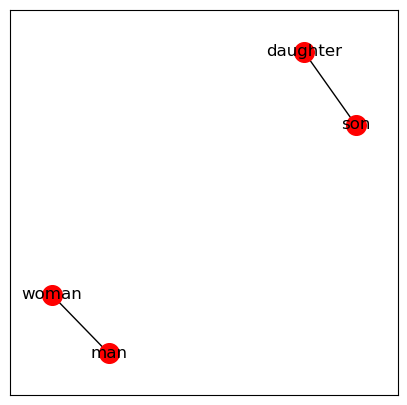

Analogy: fast is to fastest as cold is to coldest


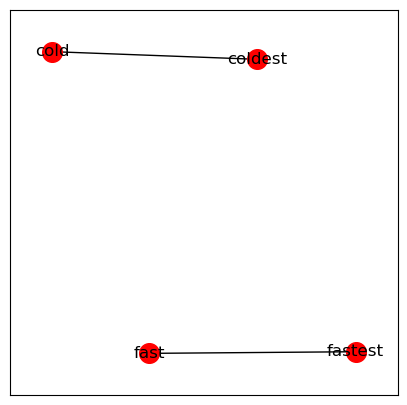

Analogy: large is to largest as high is to highest


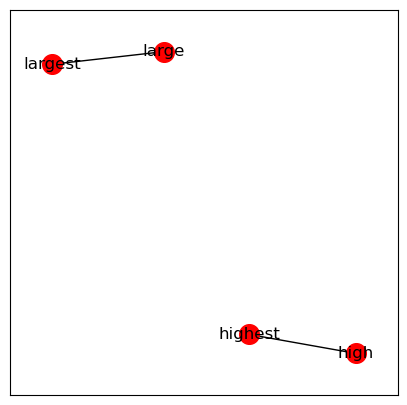

Analogy: sing is to singing as walk is to walking


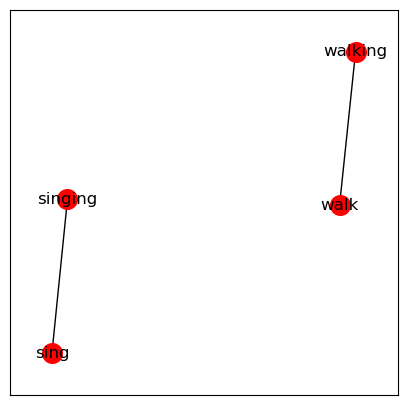

Analogy: predicting is to predicted as flying is to flew


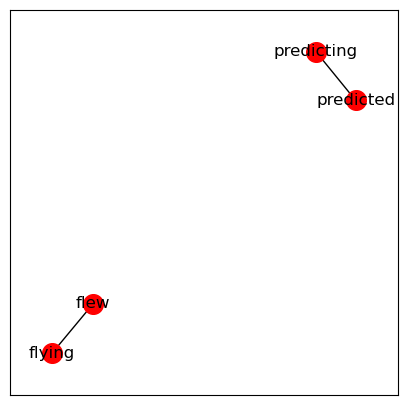

Analogy: saying is to said as implementing is to implemented


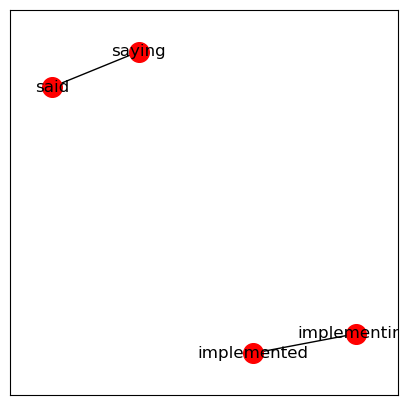

Analogy: buy is to bought as sell is to sold


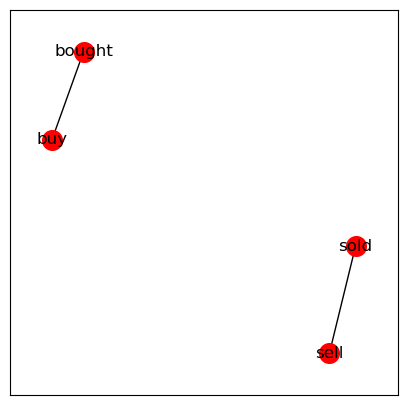

Analogy: seeing is to saw as singing is to sang


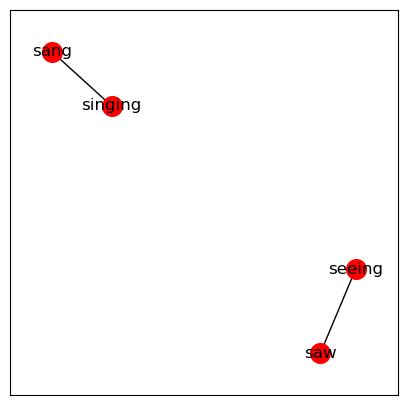

Analogy: walking is to walked as sleeping is to slept


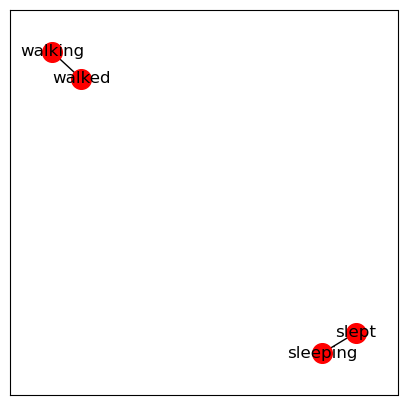

Analogy: thinking is to thought as flying is to flew


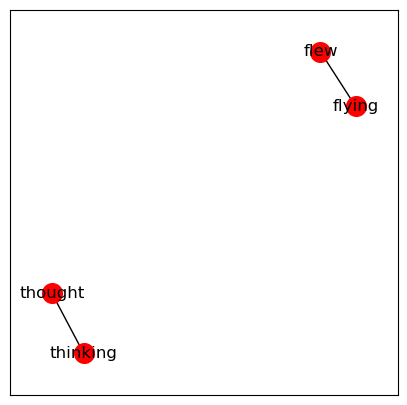

In [50]:
# load skip-gram model
cbow_negative = Word2Vec.load('D:\DS504 Natural Language Processing\Assignment 2\cbow_with_negative_model')

# evaluate
sp = evaluate_model(cbow_negative, df)

# print spearman correlation score
print('Spearman correlation for CBOW with Negative Sampling model: ', sp.correlation, ' with p-value: ', sp.pvalue)

print("Plotting Semantic Analogy for CBOW with Negative Sampling")

for a, b, c, d in words_list:
    print("Analogy: {} is to {} as {} is to {}".format(a, b, c, d))
    plot_graph(a, b, c, d, cbow_negative)

In [83]:
# Calculate Spearman correlation for key vector model

# evaluate model on SimLex-999 dataset using spearmen correlation coefficient
def glove_evaluate_model(model, df):
    # create list of word pairs
    word_pairs = list(zip(df['word1'], df['word2']))
    # create list of similarity scores
    similarity_scores = []
    # create list of predicted similarity scores
    predicted_similarity_scores = []
    cnt = 0
    total = 0
    # iterate over word pairs
    for word_pair in word_pairs:
        total += 1
        # get word embeddings for word pair if both words are present in vocabulary
        if word_pair[0] in model.key_to_index.keys() and word_pair[1] in model.key_to_index.keys():
            word1_embedding = model[word_pair[0]]
            word2_embedding = model[word_pair[1]]
        else:
            continue
        # calculate cosine similarity between word embeddings
        cosine_similarity = np.dot(word1_embedding, word2_embedding) / (np.linalg.norm(word1_embedding) * np.linalg.norm(word2_embedding))
        # append cosine similarity to predicted similarity scores list
        predicted_similarity_scores.append(cosine_similarity)
        # append similarity score to similarity scores list
        similarity_scores.append(df[df['word1'] == word_pair[0]][df['word2'] == word_pair[1]]['SimLex999'].values[0])
        cnt += 1
    
    print('Evaluated for {} word pairs out of {}'.format(cnt, total))
    # calculate spearman correlation
    spearman_correlation = spearmanr(similarity_scores, predicted_similarity_scores)
    # return spearman correlation
    return spearman_correlation

GLOVE WITHOUT NEGATIVE SAMPLING

d:\codes\python\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Evaluated for 999 word pairs out of 999
Spearman correlation for Glove without Negative Sampling model:  0.29755243568550727  with p-value:  7.150890595253936e-22
Plotting Semantic Analogy for Glove without Negative Sampling
Analogy: man is to woman as son is to daughter


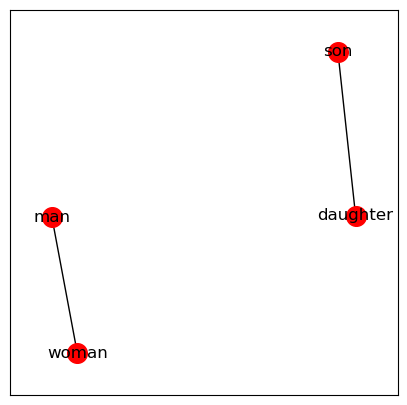

Analogy: fast is to fastest as cold is to coldest


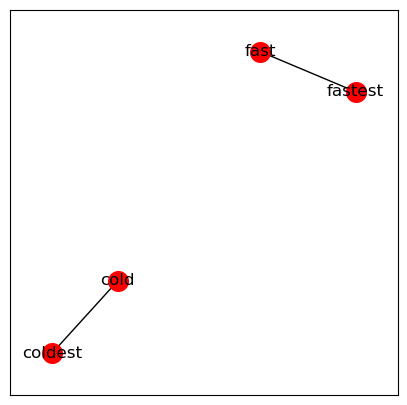

Analogy: large is to largest as high is to highest


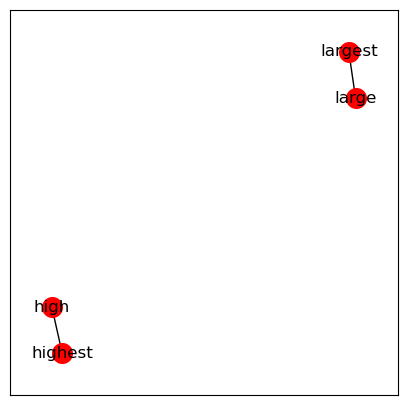

Analogy: sing is to singing as walk is to walking


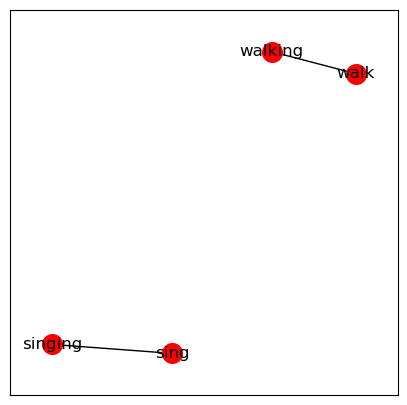

Analogy: predicting is to predicted as flying is to flew


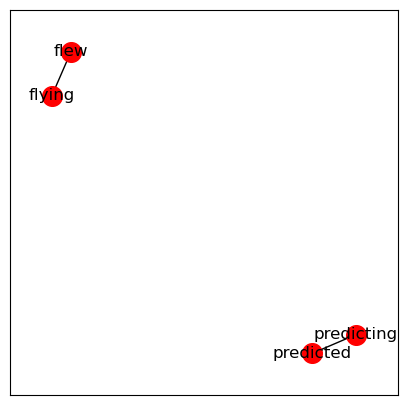

Analogy: saying is to said as implementing is to implemented


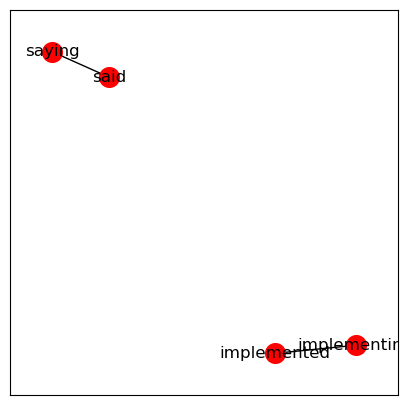

Analogy: buy is to bought as sell is to sold


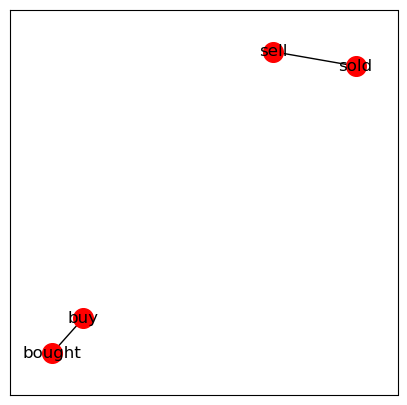

Analogy: seeing is to saw as singing is to sang


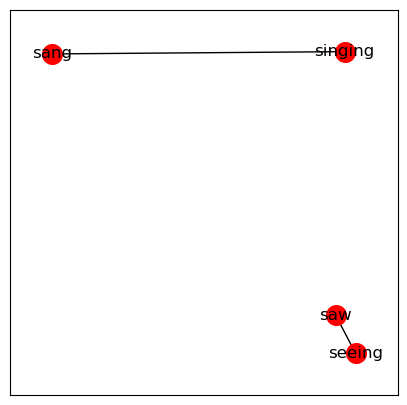

Analogy: walking is to walked as sleeping is to slept


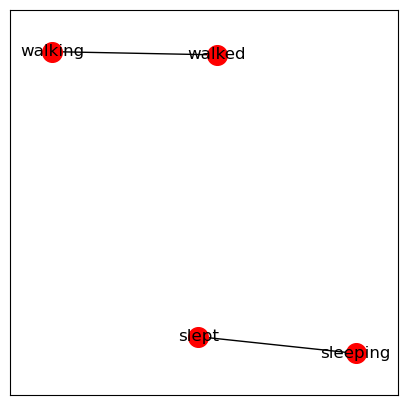

Analogy: thinking is to thought as flying is to flew


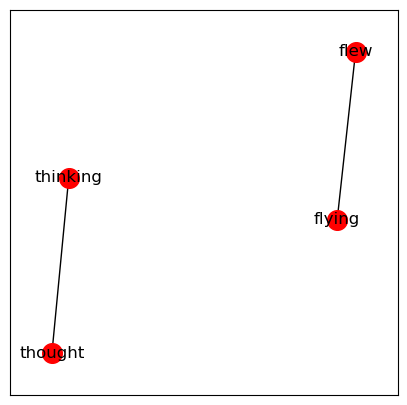

In [85]:
# load skip-gram model
glove_no_negative = KeyedVectors.load('D:\DS504 Natural Language Processing\Assignment 2\glove_without_negative_model.bin')

# evaluate
sp = glove_evaluate_model(glove_no_negative, df)

# print spearman correlation score
print('Spearman correlation for Glove without Negative Sampling model: ', sp.correlation, ' with p-value: ', sp.pvalue)

print("Plotting Semantic Analogy for Glove without Negative Sampling")

for a, b, c, d in words_list:
    print("Analogy: {} is to {} as {} is to {}".format(a, b, c, d))
    plot_graph(a, b, c, d, glove_no_negative)

GLOVE WITH NEGATIVE SAMPLING

d:\codes\python\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Evaluated for 999 word pairs out of 999
Spearman correlation for Glove with Negative Sampling model:  0.29755243568550727  with p-value:  7.150890595253936e-22
Plotting Semantic Analogy for Glove with Negative Sampling
Analogy: man is to woman as son is to daughter


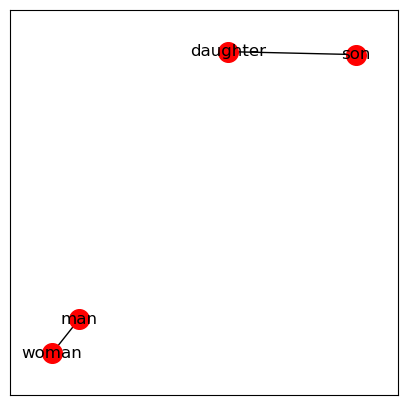

Analogy: fast is to fastest as cold is to coldest


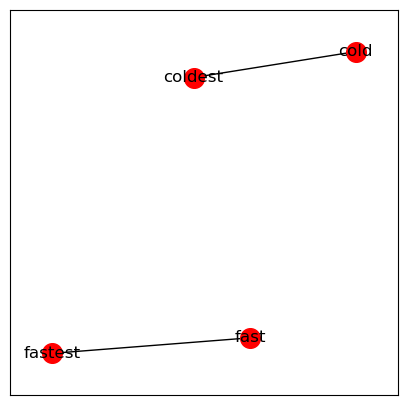

Analogy: large is to largest as high is to highest


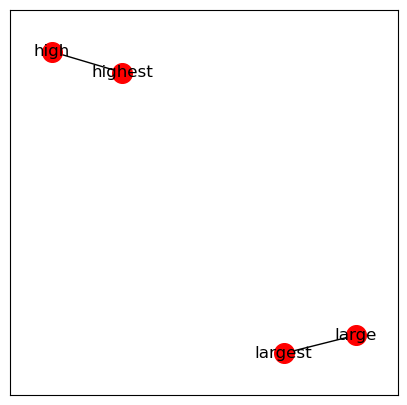

Analogy: sing is to singing as walk is to walking


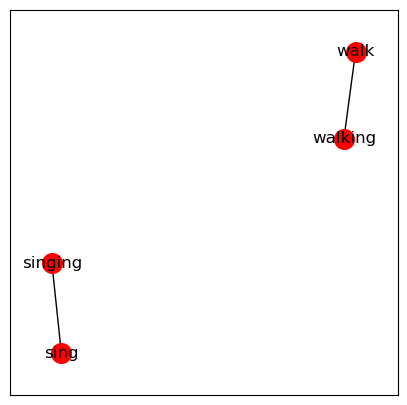

Analogy: predicting is to predicted as flying is to flew


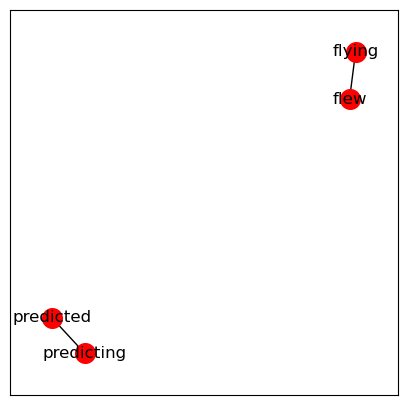

Analogy: saying is to said as implementing is to implemented


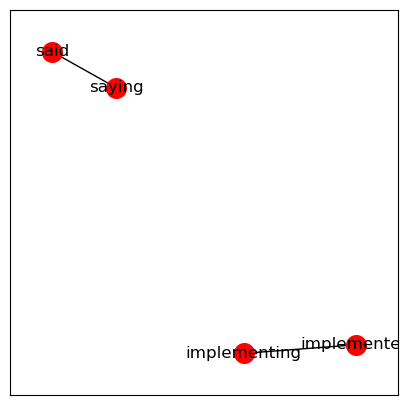

Analogy: buy is to bought as sell is to sold


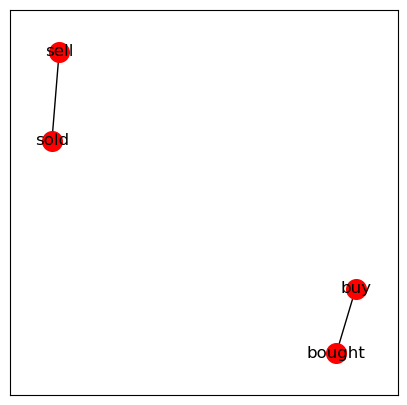

Analogy: seeing is to saw as singing is to sang


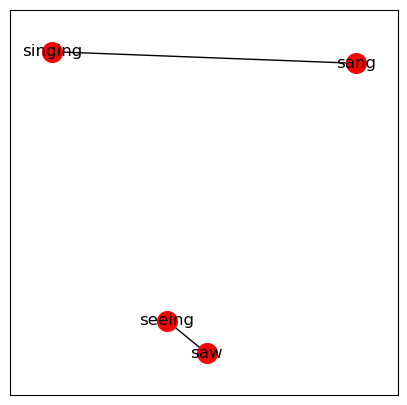

Analogy: walking is to walked as sleeping is to slept


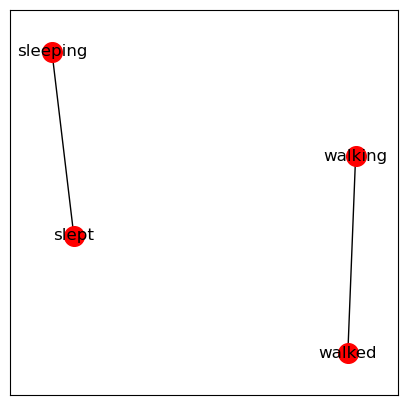

Analogy: thinking is to thought as flying is to flew


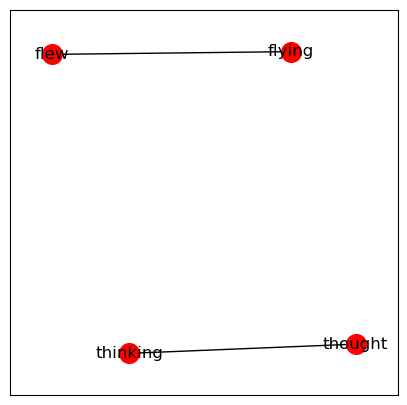

In [86]:
# load skip-gram model
glove_negative = KeyedVectors.load('D:\DS504 Natural Language Processing\Assignment 2\glove_with_negative_model.bin')

# evaluate
sp = glove_evaluate_model(glove_negative, df)

# print spearman correlation score
print('Spearman correlation for Glove with Negative Sampling model: ', sp.correlation, ' with p-value: ', sp.pvalue)

print("Plotting Semantic Analogy for Glove with Negative Sampling")

for a, b, c, d in words_list:
    print("Analogy: {} is to {} as {} is to {}".format(a, b, c, d))
    plot_graph(a, b, c, d, glove_negative)